In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Here it is explained how to read an image, show image from your directory and then using a function to convert it into grayscale.
cv2.destroyAllWindows is an compusory function to avoid crashing of Notebook.

In [2]:
input2 = cv2.imread("C:/Users/User/User/Desktop/22500900.jpg")
cv2.imshow("ayush",input2)
cv2.waitKey()
grayimg = cv2.cvtColor(input2,cv2.COLOR_BGR2GRAY)
cv2.imshow("ayush_gray",grayimg)
cv2.waitKey()
cv2.destroyAllWindows()

Shape of the input image can be seen as described below.

In [3]:
input2.shape

(222, 222, 3)

While reading the image if you pass the rgument as 0 the image will be automatically be read as gray scaled.

In [4]:
input3 = cv2.imread("C:/Users/User/User/Desktop/22500900.jpg",0)
cv2.imshow("GrayShort",input3)
cv2.waitKey()
cv2.destroyAllWindows()

You can see that the gray image do not have three channels as in the RGB one. Confirmation below. 

In [5]:
input3.shape

(222, 222)

Now we will see the Red only, Blue only, Green only parts of the selected image.

In [6]:
B,G,R = cv2.split(input2)
zeros = np.zeros(input2.shape[:2],dtype = 'uint8')
cv2.imshow('Red',cv2.merge([zeros,zeros,R]))
cv2.imshow('Green',cv2.merge([zeros,G,zeros]))
cv2.imshow('Blue',cv2.merge([B,zeros,zeros]))
cv2.waitKey()
cv2.destroyAllWindows()

Now showing the intensity of the colors using the matplotlib function.

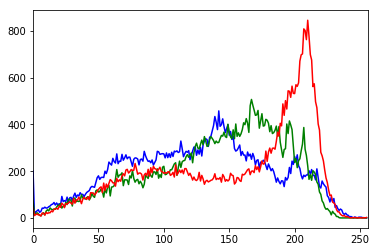

In [7]:
color = ['b','g','r']
for i,col in enumerate(color):
    histogram2 = cv2.calcHist([input2],[i],None,[256],[0,256])
    plt.plot(histogram2,color = col)
    plt.xlim([0,256])
    
plt.show()

Now we will learn about IMAGE MANUIPULATIONS:

1) Translations:

We use cv2.warpAffine(image, T : translation vector, (Width,Height))

In [8]:
input_1 = cv2.imread("C:/Users/User/User/Desktop/22500900.jpg")
height, width = input_1.shape[:2]

fourth_H,fourth_W = height/4, width/4

#             | 1  0  Tx |
# T    =      | 0  1  Ty |

T = np.float32([[1,0,fourth_W],[0,1,fourth_H]])


translation = cv2.warpAffine(input_1,T,(width,height))
cv2.imshow('Translated',translation)
cv2.waitKey()
cv2.destroyAllWindows()

2) Rotatons :                  WE USE 

cv2.getRotationMatrix2D(centre_x,centre_y,angle of rotation,scale)

Now implementing using the warpAffine function only.

In [9]:
input_1 = cv2.imread("C:/Users/User/User/Desktop/22500900.jpg")
height, width = input_1.shape[:2]

rotation_Matrix = cv2.getRotationMatrix2D((height/2, width/2),60,1) # Rotationing by 60 degree.

rotation = cv2.warpAffine(input_1,rotation_Matrix,(width,height))
cv2.imshow('Rotated',rotation)
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
# For only a 90 degree rotation there is quicker way.

cv2.imshow('Transposed',cv2.transpose(input_1))
cv2.waitKey()
cv2.destroyAllWindows()

#Notice here a transpose operation has taken place. 

3)  SCALING, RESIZING, INTERPOLATION.

In [11]:
input_1 = cv2.imread("C:/Users/User/User/Desktop/22500900.jpg")

# Make the image (3/4)th of the original size.
image_scaled = cv2.resize(input_1, None, fx = 0.75, fy = 0.75)
cv2.imshow("Scaling_linear",image_scaled)
cv2.waitKey()

# Make the image twice its size.
image_scaled = cv2.resize(input_1,None,fx=2,fy=2, interpolation = cv2.INTER_CUBIC)
cv2.imshow("Scaling_cubic",image_scaled)
cv2.waitKey()

# Make the image as of the desired size. 
image_scaled = cv2.resize(input_1,(100,100), interpolation=cv2.INTER_AREA)
cv2.imshow("Scaling_linear",image_scaled)
cv2.waitKey()

cv2.destroyAllWindows()

4) Cropping an Image

In [12]:
input_1 = cv2.imread("C:/Users/User/User/Desktop/22500900.jpg")
height, width = input_1.shape[:2]

start_x, start_y = int(width*0.05),int(height*0.4)
end_x, end_y = int(width*0.75),int(height*0.95)


cropped = input_1[start_x:end_x,start_y:end_y]

cv2.imshow("original",input_1)
cv2.waitKey()
cv2.imshow("cropped", cropped)
cv2.waitKey()
cv2.destroyAllWindows()

5) Brightness or Darkennig of an image./ Arithmetic operations

In [13]:
input_1 = cv2.imread("C:/Users/User/User/Desktop/22500900.jpg")

M = np.ones(input_1.shape,dtype='uint8')*125

cv2.imshow("original",input_1)
cv2.waitKey()
bright = cv2.add(input_1,M)
cv2.imshow("bright",bright)
cv2.waitKey()
dark = cv2.subtract(input_1,M)
cv2.imshow("dark_one",dark)
cv2.waitKey()
cv2.destroyAllWindows()

6) Bitwise operations

7) Blurring

In [14]:
input_1 = cv2.imread("C:/Users/User/User/Desktop/22500900.jpg")
cv2.imshow("original",input_1)
cv2.waitKey()
b1 = cv2.blur(input_1,(3,3))
cv2.imshow("Averaging",b1)
cv2.waitKey()

b2 = cv2.GaussianBlur(input_1,(3,3),0)
cv2.imshow("Gaussian",b2)
cv2.waitKey()

b3 = cv2.medianBlur(input_1,3)  # to give watercolor effect.  Higher the value, higher will be the blur and wclr effect.
cv2.imshow("median",b3)
cv2.waitKey()

b4 = cv2.bilateralFilter(input_1,9,75,75)
cv2.imshow("Bilateral",b4)
cv2.waitKey()

cv2.destroyAllWindows()

BONUS: IMAGE DE-noising

In [15]:
input_1 = cv2.imread("C:/Users/User/User/Desktop/22500900.jpg")

dst = cv2.fastNlMeansDenoisingColored(input_1,None,6,6,7,21)
cv2.imshow("Fast Means Denoising ",dst)
cv2.waitKey()

cv2.destroyAllWindows()

8) SHARPENNING

Here notice that the Kernel is a bit differently normalised.

In [16]:
input_1 = cv2.imread("C:/Users/User/User/Desktop/22500900.jpg")

Ker_sharp = np.array([[-2,-2,-2],
                      [-2,18,-2],
                      [-2,-2,-2]])

sharpened = cv2.filter2D(input_1,-1,Ker_sharp)

cv2.imshow("original",input_1)
cv2.waitKey()
cv2.imshow("Sharp image",sharpened)
cv2.waitKey()
cv2.destroyAllWindows()

9) Thresh-Holding Basically Cutoff at a particular point. Will understand in the Mini Project. 

10)  Morphology Operations : Dilation, Erosion, Opening, Closing.

In [17]:
input_2 = cv2.imread("C:/Users/User/User/Desktop/ayush.jpg",0)
cv2.imshow("original",input_2)

kernel = np.ones((5,5),np.uint8)

erosion = cv2.erode(input_2,kernel,iterations = 1)
cv2.imshow("eroded",erosion)
cv2.waitKey()

dialation = cv2.dilate(input_2,kernel,iterations = 1)
cv2.imshow("dilated",dialation)
cv2.waitKey()

opening = cv2.morphologyEx(input_2,cv2.MORPH_OPEN,kernel)
cv2.imshow("open",opening)
cv2.waitKey()

closing = cv2.morphologyEx(input_2,cv2.MORPH_CLOSE,kernel)
cv2.imshow("close",closing)
cv2.waitKey()

cv2.destroyAllWindows()

11) Edge Detection

In [18]:
input_1 = cv2.imread("C:/Users/User/User/Desktop/22500900.jpg",0)

# Sobel Edge detection.

height, width = input_1.shape

sobel_x = cv2.Sobel(input_1,cv2.CV_64F,0,1,ksize=5)
sobel_y = cv2.Sobel(input_1,cv2.CV_64F,1,0,ksize=5)

cv2.imshow("original",input_1)
cv2.waitKey()
cv2.imshow("SobelX",sobel_x)
cv2.waitKey()
cv2.imshow("SobelY",sobel_y)
cv2.waitKey()
cv2.imshow("Combined Sobel",cv2.bitwise_or(sobel_x,sobel_y))
cv2.waitKey()

# Laplacian Edge Detection

cv2.imshow("Laplacian",cv2.Laplacian(input_1,cv2.CV_64F))
cv2.waitKey()


# Canny Edge Detection.

cv2.imshow("Canny",cv2.Canny(input_1,20,170))
cv2.waitKey()

cv2.destroyAllWindows()

MINI PROJECT NUMBER 1   : Implement all these.

In [19]:
def Sketch(Img):
    gray_img = cv2.cvtColor(Img,cv2.COLOR_BGR2GRAY)
    
    gray_img_blur = cv2.GaussianBlur(gray_img,(5,5),0)
    
    canny_edges = cv2.Canny(gray_img_blur,10,70)
    
    ret, mask = cv2.threshold(canny_edges,70,255, cv2.THRESH_BINARY_INV)
    
    return mask

cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()
    cv2.imshow("Our Live Sketch",Sketch(frame))
    if cv2.waitKey(1) == 13:
        break
        
cap.release()
cv2.destroyAllWindows()